[Open this notebook in Google Colab](https://github.com/Mish80/Jupyter-notebooks-for-modelling-and-training-in-computational-nuclear-reactor-engineering/blob/main/PFNSpectra/PFNSpectra.ipynb)

In [112]:
!quarto render PFNSpectra.ipynb --to html --self-contained

pandoc --self-contained
  to: html
  output-file: PFNSpectra.html
  standalone: true
  section-divs: true
  html-math-method: mathjax
  wrap: none
  default-image-extension: png
  toc: true
  toc-depth: 3
  number-sections: true
  
metadata
  document-css: false
  link-citations: true
  date-format: long
  lang: en
  title: |
    ![](NWUlogo.jpg)
    MSc. Nuclear Engineering Project:
    Jupyter notebooks for modelling and training in computational nuclear reactor engineering
  subtitle: The Prompt Fission Neutron Energy Spectrum
  author:
    - Mishka Karodia (NWU Student No. 50154168)
    - Prof. Pavel Bokov (Supervisor)
    - Mr. Johann van Rooyen (Co-Supervisor)
  date: '2024'
  bibliography:
    - References.bib
  toc-expand: 3
  toc-title: Table of Contents
  toc-location: left-body
  toc-float: true
  number-depth: 3
  theme: pulse
  text-align: justify
  page-layout: full
  other-formats: false
  
[WARNING] Citeproc: citation vanrooyenNuclearReactorTechnology2022 not found
[WAR

# Introduction: Prompt fission neutron (PFN) energy spectrum <a id="intro"></a>

Approximately 99% of neutrons released during fission are prompt fission neutrons (PFNs), emitted almost immediately. Fissile and fissionable actinides produce PFN energy spectra that are broadly similar in overall characteristics. They differ in the energy distribution and average energy of the emitted neutrons, with fissile isotopes typically generating a higher yield of neutrons at lower energies compared to fissionable isotopes [@lamarshIntroductionNuclearEngineering2001]. The energy spectrum of PFNs is crucial in reactor analysis thus the accurate representation of the PFN emission spectrum is critical in reactor analysis. 

The Jupyter notebook for the analysis and visualisation of PFN emission spectra for important actinides, will enable students to investigate a range of topics like calculating average neutron emission energies and unshielded neutron dose rates around hypothetical point reactors, illustrating the need for biological shielding around reactors.

The simplified Watt distribution [@vanrooyenNuclearReactorTechnology2022]:

\begin{equation}
\textit{Q}_{\mathrm{PFN}}(E) = a \exp{\left(\frac{-E}{b}\right)} \sinh{\left(\sqrt{c E}\right)}
\end{equation}

For further information (theoretical or mathematical), please refer to the chapter on "Educational Jupyter notebook 1: Prompt fission neutron (PFN) energy spectrum" in the dissertation titled "Jupyter notebooks for modelling and training in computational nuclear reactor engineering".


# Code implementation <a id="code"></a>

## Import relevant libraries & sub-modules <br>

* numpy: numerical computations
* matplotlib: core library for visualizations
* matplotlib.pyplot: sub module for a MATLAB-like interface
* statistics: collection of functions for performing common statistical calculations on numerical data 
* seaborn: data visualization library built on top of matplotlib <br>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

## Configure notebook view

Configure the following within the notebook: <br>

* plots to be displayed inline within the notebook
* rendered plot resolution 
* defult plot format (svg/jpeg etc.)
* plot style with seaborn

In [45]:
mpl.rcdefaults()  # Reset matplotlib settings
sns.reset_defaults()  # Reset seaborn settings

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_format='svg'

sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 1.5})
sns.set_style("whitegrid", {
    # "axes.facecolor": "white",  # White background for axes
    # "figure.facecolor": "white"  # White background for the figure
})
sns.set_palette("muted")

sns.set_theme(
    rc={
        "figure.figsize": (10, 6),  # Global figure size

        "axes.grid": True,  # Turn on grid

        "axes.titlesize": 18,  # Font size for title
        "axes.titleweight": 'bold',  # Bold title

        "axes.labelsize": 14,  # Font size for x and y labels
        "axes.labelweight": 'normal',  # Set font weight for axis labels

        "axes.edgecolor": "black",  # Set the color of the axis border (main x and y axes)

        "xtick.color": "black",  # Color of the x-axis ticks
        "ytick.color": "black",  # Color of the y-axis ticks
        "xtick.labelsize": 12,  # Size of x-axis tick labels
        "ytick.labelsize": 12,  # Size of y-axis tick labels

        "legend.fontsize": 12,  # Legend font size
        "legend.loc": 'best',  # Default legend location

        "grid.color": "gray",  # Grid line color
        "grid.alpha": 1.0,  # Grid line transparency
        "grid.linestyle": ":",  # Grid line style
        "grid.linewidth": 1.0,  # Grid line width
        
        "figure.autolayout": False,  # Prevents tight layout auto-adjustment
    }
)

mpl.rcParams['axes.facecolor'] = 'white'  # White background for axes
mpl.rcParams['figure.facecolor'] = 'white'  # White background for the figure

## Declaration of constants

Parameters for the Watt Approximation need to be declared as constants [@vanrooyenNuclearReactorTechnology2022].

In [76]:
a_U235 = 0.4396 
b_U235 = 0.988
c_U235 = 2.249

a_U238 = 0.5759 
b_U238 = 1.0269
c_U238 = 1.5776

a_Pu239 = 0.5710 
b_Pu239 = 1.1593
c_Pu239 = 1.2292

## Energy range set-up

The expected upper and lower PFN energy level range needs to be declared such that the appropriate graph can be plotted. Around 70-80% of PFNs are emitted with the energy between 0-10 MeV [@lamarshIntroductionNuclearEngineering2001]. One can then safely set the lower and upper bounds to 0 and 15 MeV respectively.

For the lower bound, we will use a value slightly above machine epsilon (smallest positive number representable by your computer). This helps avoid potential issues with extremely small values.

In [107]:
E_min = np.log10(1.00000001E-11)
E_max = np.log10(20)
E = np.linspace(10**E_min, 10**E_max, num=9999, endpoint=True)

## Defining the Watt energy spectrum equation

In [108]:
def Q_pfn_U235(E):
    return a_U235*np.exp(-E/b_U235) * np.sinh(np.sqrt(c_U235*E))
def Q_pfn_U238(E):
    return a_U238*np.exp(-E/b_U238) * np.sinh(np.sqrt(c_U238*E))
def Q_pfn_Pu239(E):
    return a_Pu239*np.exp(-E/b_Pu239) * np.sinh(np.sqrt(c_Pu239*E))

## Plotting the PFN energy spectrum

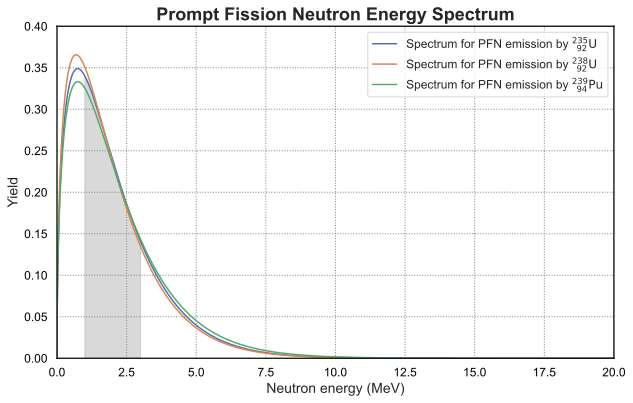

In [109]:
fig, ax = plt.subplots() 

sns.lineplot(x=E, y=Q_pfn_U235(E), label=r'Spectrum for PFN emission by ${_{\;\;92}^{235}}\mathsf{U}$')
sns.lineplot(x=E, y=Q_pfn_U238(E), label=r'Spectrum for PFN emission by ${_{\;\;92}^{238}}\mathsf{U}$')
sns.lineplot(x=E, y=Q_pfn_Pu239(E), label=r'Spectrum for PFN emission by ${_{\;\;94}^{239}}\mathsf{Pu}$')

ax.set_title('Prompt Fission Neutron Energy Spectrum')
ax.set_xlabel('Neutron energy (MeV)') 
ax.set_ylabel('Yield')
ax.set_xlim(0, 20)
ax.set_ylim(0, 0.4)

E1=1
E2=3
ax.fill_between(E, 0, Q_pfn_U235(E), where=(E >= E1) & (E <= E2), color='gray', alpha=0.3)

## Calculating the average no. of PFNs emitted in a certain energy range

In [110]:
isotopes = {
    'U-235': Q_pfn_U235,
    'U-238': Q_pfn_U238,
    'Pu-239': Q_pfn_Pu239
}

The range is shaded in the above plot for $^{235}U$.

In [111]:
for isotope, Q_function in isotopes.items():
    TotalYield = sum(Q_function(E))
    Yield = sum(Q_function(E[(E >= E1) & (E <= E2)]))
    PercentYield = (Yield / TotalYield) * 100
    
    print(f'Percentage of {isotope} fission neutrons emitted between {E1:.2g} MeV and {E2:.2g} MeV is {PercentYield:.5g} %.')

Percentage of U-235 fission neutrons emitted between 1 MeV and 3 MeV is 48.032 %.
Percentage of U-238 fission neutrons emitted between 1 MeV and 3 MeV is 47.796 %.
Percentage of Pu-239 fission neutrons emitted between 1 MeV and 3 MeV is 46.904 %.


## Calculating the average energy of PFNs emitted 

In [104]:
for isotope, Q_function in isotopes.items():
    average_energy = sum(E * Q_function(E)) / sum(Q_function(E))
    print(f'The average energy of the PFNs for U-235 = {average_energy:.4g} MeV')

The average energy of the PFNs for U-235 = 2.031 MeV
The average energy of the PFNs for U-235 = 1.956 MeV
The average energy of the PFNs for U-235 = 2.152 MeV
